In [1]:
import pandas as pd
from sklearn.metrics import DistanceMetric
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.manifold import MDS
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from sklearn.preprocessing import StandardScaler
import utils
import config
import re
import os

In [2]:
# set figure details
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
rc("svg", fonttype="none") 

In [7]:
! ls ../data/raw

DNA_methylase.txt
IGG_v1.0-metadata.tsv
MAGIC_outpatientCHOP_antimicrob_041223.xlsx - anti-infOPT_deid.tsv
bos_taurus.tsv
bos_taurus_nohuman.tsv
clusters.txt
clusters_allgenes_inputfilter.txt
colibactin_depth.csv
colibactin_genes.tsv
crispr.txt
data_dictionary_metadata_short_SH.tsv
depths.tsv
estimate-output
glycosyltransferase.txt
human.tsv
humann_genefamilies_overall.tsv
humann_genefamilies_overall_reduced.tsv
humann_pathabundance.tsv
humann_pathabundance_overall.tsv
humann_pathcoverage.tsv
humann_pathcoverage_overall.tsv
humann_pathcoverage_overall_reduced.tsv
magic_jan2023_duplicates.tsv
magic_jan2023_positive_control_samples.tsv
metadata_short_feb2023.tsv
output.txt
phage.txt
pks_cluster_NC101.fasta
pks_cluster_NC101.gff
profiles_allgenes_inputfilter.txt
reduced_CAG_clusters.tsv
reduced_CAG_profiles.tsv
restriction_endonuclease.txt
species_gtdb.tsv
species_rarefied.txt
thioredoxin.txt
transposase_integrase_recombinase.txt


In [11]:
df = pd.read_csv("../data/raw/profiles_allgenes_inputfilter.txt", sep="\t", index_col=0, header=None)
df = df.T
df

,CAG00001,CAG00002,CAG00003,CAG00004,CAG00005,CAG00006,CAG00007,CAG00008,CAG00009,CAG00010,...,CAG27809,CAG27810,CAG27811,CAG27812,CAG27813,CAG27814,CAG27815,CAG27816,CAG27817,CAG27818
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000019,0.0,0.000000,0.000000,2.474750e-06,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000005,0.0,0.000000,0.000000,2.309360e-06,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9.946710e-07,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.519240e-06,0.000000,...,0.000000,8.095020e-07,0.000001,0.000045,0.000007,0.0,0.000000,0.000146,1.886600e-05,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.104770e-07,0.000000,...,0.000000,0.000000e+00,0.000001,0.000020,0.000000,0.0,0.000000,0.000089,5.444550e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,0.0,0.0,0.0,0.0,0.000041,0.0,0.000004,0.000000,0.000000e+00,0.000009,...,0.000018,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000021,0.000000,0.000000e+00,0.0
3440,0.0,0.0,0.0,0.0,0.000015,0.0,0.000007,0.000007,0.000000e+00,0.000086,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0
3441,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000011,...,0.000003,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0
3442,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000089,...,0.000056,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0


In [12]:
df = df.iloc[:-1, :]
df

,CAG00001,CAG00002,CAG00003,CAG00004,CAG00005,CAG00006,CAG00007,CAG00008,CAG00009,CAG00010,...,CAG27809,CAG27810,CAG27811,CAG27812,CAG27813,CAG27814,CAG27815,CAG27816,CAG27817,CAG27818
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000019,0.0,0.000000,0.000000,2.474750e-06,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000005,0.0,0.000000,0.000000,2.309360e-06,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9.946710e-07,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.519240e-06,0.000000,...,0.000000,8.095020e-07,0.000001,0.000045,0.000007,0.0,0.000000,0.000146,1.886600e-05,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.104770e-07,0.000000,...,0.000000,0.000000e+00,0.000001,0.000020,0.000000,0.0,0.000000,0.000089,5.444550e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,0.0,0.0,0.0,0.0,0.000024,0.0,0.000036,0.000000,0.000000e+00,0.000683,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0
3439,0.0,0.0,0.0,0.0,0.000041,0.0,0.000004,0.000000,0.000000e+00,0.000009,...,0.000018,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000021,0.000000,0.000000e+00,0.0
3440,0.0,0.0,0.0,0.0,0.000015,0.0,0.000007,0.000007,0.000000e+00,0.000086,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0
3441,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000011,...,0.000003,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0


In [14]:
metadata = pd.read_csv("../data/clean/metadata.tsv", sep="\t", index_col=0)
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388


In [15]:
df.index = metadata.index
df

,CAG00001,CAG00002,CAG00003,CAG00004,CAG00005,CAG00006,CAG00007,CAG00008,CAG00009,CAG00010,...,CAG27809,CAG27810,CAG27811,CAG27812,CAG27813,CAG27814,CAG27815,CAG27816,CAG27817,CAG27818
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000019,0.0,0.000000,0.000000,2.474750e-06,0.0
magic.0004,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000005,0.0,0.000000,0.000000,2.309360e-06,0.0
magic.0006,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9.946710e-07,0.0
magic.0007,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.519240e-06,0.000000,...,0.000000,8.095020e-07,0.000001,0.000045,0.000007,0.0,0.000000,0.000146,1.886600e-05,0.0
magic.0008,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.104770e-07,0.000000,...,0.000000,0.000000e+00,0.000001,0.000020,0.000000,0.0,0.000000,0.000089,5.444550e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0.0,0.0,0.0,0.0,0.000024,0.0,0.000036,0.000000,0.000000e+00,0.000683,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0
magic.6597,0.0,0.0,0.0,0.0,0.000041,0.0,0.000004,0.000000,0.000000e+00,0.000009,...,0.000018,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000021,0.000000,0.000000e+00,0.0
magic.6598,0.0,0.0,0.0,0.0,0.000015,0.0,0.000007,0.000007,0.000000e+00,0.000086,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0


In [17]:
transformed = df
transformed

,CAG00001,CAG00002,CAG00003,CAG00004,CAG00005,CAG00006,CAG00007,CAG00008,CAG00009,CAG00010,...,CAG27809,CAG27810,CAG27811,CAG27812,CAG27813,CAG27814,CAG27815,CAG27816,CAG27817,CAG27818
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000019,0.0,0.000000,0.000000,2.474750e-06,0.0
magic.0004,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000005,0.0,0.000000,0.000000,2.309360e-06,0.0
magic.0006,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9.946710e-07,0.0
magic.0007,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.519240e-06,0.000000,...,0.000000,8.095020e-07,0.000001,0.000045,0.000007,0.0,0.000000,0.000146,1.886600e-05,0.0
magic.0008,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.104770e-07,0.000000,...,0.000000,0.000000e+00,0.000001,0.000020,0.000000,0.0,0.000000,0.000089,5.444550e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0.0,0.0,0.0,0.0,0.000024,0.0,0.000036,0.000000,0.000000e+00,0.000683,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0
magic.6597,0.0,0.0,0.0,0.0,0.000041,0.0,0.000004,0.000000,0.000000e+00,0.000009,...,0.000018,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000021,0.000000,0.000000e+00,0.0
magic.6598,0.0,0.0,0.0,0.0,0.000015,0.0,0.000007,0.000007,0.000000e+00,0.000086,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0


In [121]:
# metadata = metadata.loc[transformed.index]
# metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
magic.0010,101,no,12/10/16,2230,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0010,Knights_Project_076_Pool3,magic.0010.S167.001.fa,PowerSoil,7251673
magic.0012,105,no,12/22/16,950,1,regular,NaN,NaN,NaN,soft,...,No antibiotics,Vaginal,0.26,1.0,1.0,magic.0012,Knights_Project_076_Pool3,magic.0012.S177.001.fa,PowerSoil,8106772
magic.0014,106,no,12/22/16,250,1,regular,NaN,NaN,NaN,watery,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0014,Knights_Project_068_Pool1,magic.0014.S1.001.fa,PowerSoil,15346610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388
magic.6599,573,NaN,7/21/21,845,96,regular,NaN,NaN,NaN,soft,...,Other antibiotics,C-section with labor,24.08,NaN,NaN,magic.6599,Knights_Project_077_Pool3,magic.6599.S288.001.fa,PowerSoilPro,1519641


In [18]:
metadata = metadata[~metadata["Timeline_Weeks"].isna() & 
                         (metadata["Timeline_Weeks"] != "na") & 
                         (metadata["abx_day"].apply(lambda x : str(x) in ["Na", "na", "nan"]))]
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388


In [19]:
transformed = transformed.loc[metadata.index]
transformed.shape

(2523, 27818)

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_jobs=-1, random_state=42)

# from sklearn.preprocessing import StandardScaler

# scaled = StandardScaler().fit_transform(transformed)

emb = tsne.fit_transform(transformed)
emb.shape

(2523, 2)

In [21]:
metadata["tsne1"] = emb[:, 0]
metadata["tsne2"] = emb[:, 1]
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,tsne1,tsne2
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,2.152456,-29.171312
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,2.063358,-29.174208
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,-33.518372,-35.400581
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,38.869621,29.015215
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,-13.509727,-8.788021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,22.751656,22.589783
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,68.371658,-3.043999
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,52.442841,-0.561541


In [22]:
metadata["Timeline_Weeks"].unique()

array(['0', '1', '2', '3', '4', '12', '24', '36', '48', '60', '72', '84',
       '96'], dtype=object)

In [23]:
metadata["color_info"] = 0

In [24]:
for i, week in enumerate(metadata["Timeline_Weeks"].unique()):
    metadata["color_info"][metadata["Timeline_Weeks"] == week] = i

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_89440/416361651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["color_info"][metadata["Timeline_Weeks"] == week] = i
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_89440/416361651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["color_info"][metadata["Timeline_Weeks"] == week] = i
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_89440/416361651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [25]:
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,tsne1,tsne2,color_info
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,2.152456,-29.171312,0
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,2.063358,-29.174208,1
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,-33.518372,-35.400581,0
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,38.869621,29.015215,0
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,-13.509727,-8.788021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,22.751656,22.589783,12
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,68.371658,-3.043999,12
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,52.442841,-0.561541,12


In [26]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_89440/3947266101.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 13)


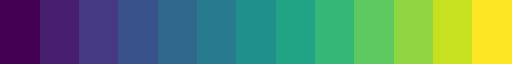

In [27]:
viridis = cm.get_cmap('viridis', 13)
viridis

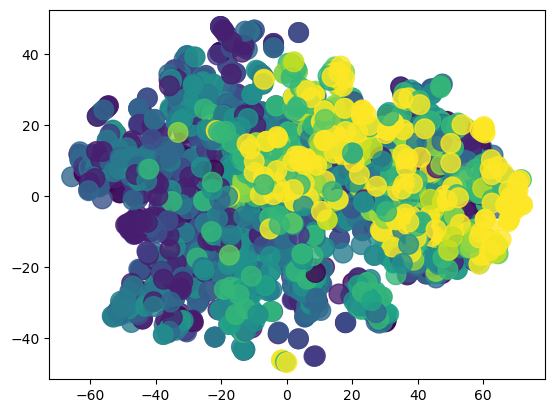

In [30]:
plt.figure()
ax = plt.gca()
sc = ax.scatter(metadata["tsne1"], metadata["tsne2"], c=metadata["color_info"], alpha=0.8, s=200, cmap=viridis)

tick_labels = metadata["Timeline_Weeks"].unique().astype(int)


No antibiotics orange
Antibiotics fuchsia


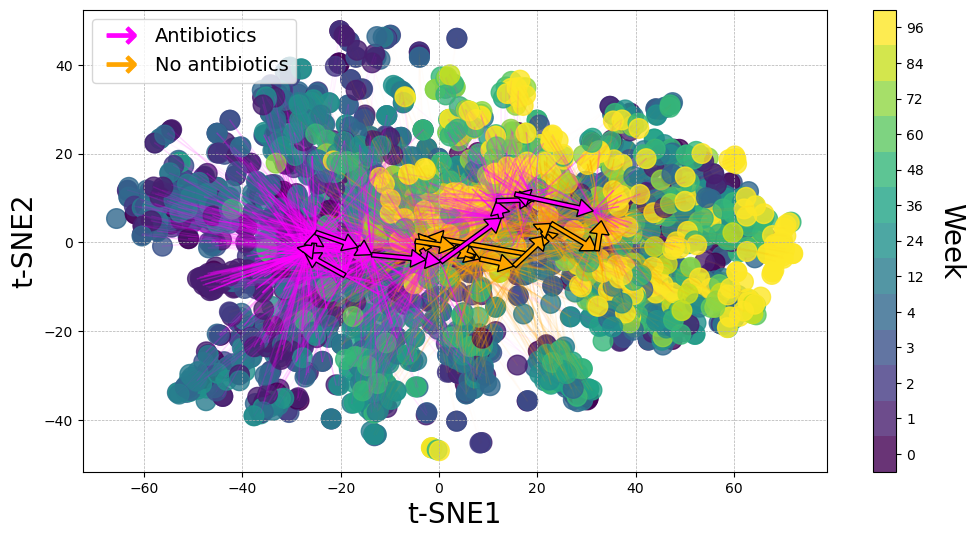

In [31]:
# plt.figure(figsize=(12, 10), dpi=200)
plt.figure(figsize=(12, 6))

arrow_colors = ["orange", "fuchsia"]

ax = plt.gca()
# edgecolors = metadata["expo_cat1"].apply(lambda x : arrow_colors[0] if x == "No antibiotics" else arrow_colors[1])
# alphas = metadata["expo_cat1"].apply(lambda x : 0.8 if x == "No antibiotics" else 0)
sc = ax.scatter(metadata["tsne1"], metadata["tsne2"], c=metadata["color_info"], alpha=0.8, s=200, cmap=viridis)


tick_labels = metadata["Timeline_Weeks"].unique().astype(int)
cbar = plt.colorbar(sc, orientation="vertical", ticks=np.arange(-1, tick_labels.shape[0]), 
                    boundaries=np.arange(-1, tick_labels.shape[0]) + 0.5)
tick_labels = [0] + list(tick_labels)
cbar.ax.set_yticklabels(tick_labels)
cbar.set_label('Week', rotation=270, fontsize=20, labelpad=30)


ax.grid(linestyle = '--', linewidth = 0.5)
# ax.legend(prop={'size': 15}, loc=1, handlelength=1.4, handleheight=1.4)

ax.set_xlabel("t-SNE1", fontsize=20)
ax.set_ylabel("t-SNE2", fontsize=20)

for i, abx in enumerate(["No antibiotics", "Antibiotics"]):
    print(abx, arrow_colors[i])

    if abx == "No antibiotics":
        data = metadata[metadata["expo_cat1"] == abx]
    else:
        data = metadata[(metadata["expo_cat1"] == "GBS antibiotics") | (
         metadata["expo_cat1"] == "Other antibiotics")]

    last = None
    for info in metadata["color_info"].unique():
        curr_data = data[data["color_info"] == info]
        x = curr_data["tsne1"].mean()
        y = curr_data["tsne2"].mean()
        
        alpha = 1
        
        # compute max_dist
        max_dist = -1
        for row in range(curr_data.shape[0]):
            start_x = x
            end_x = curr_data["tsne1"][row]
            start_y = y
            end_y = curr_data["tsne2"][row]
            dist = np.sqrt((start_x - end_x) ** 2 + (start_y - end_y) ** 2)
            max_dist = max(max_dist, dist)
        
        for row in range(curr_data.shape[0]):
            start_x = x
            end_x = curr_data["tsne1"][row]
#             xs = np.linspace(start_x, end_x, 10)
            
            start_y = y
            end_y = curr_data["tsne2"][row]
#             ys = np.linspace(start_y, end_y, 10)
#             alphas = np.power(np.linspace(1, 0, 10), 2)

            dist = np.sqrt((start_x - end_x) ** 2 + (start_y - end_y) ** 2)
            alpha = np.power((max_dist - dist) / max_dist, 4)
            alpha = 1 if np.isnan(alpha) else alpha
            
            plt.plot((start_x, end_x), (start_y, end_y), c=arrow_colors[i], linewidth=1, zorder=1, 
                     alpha=alpha)
            
#             for j in range(1, xs.shape[0]):
#                 plt.plot(xs[j - 1 : j + 1], ys[j - 1 : j + 1], #linestyle='dotted', 
#                          alpha=alphas[j], c=arrow_colors[i], linewidth=0.75, zorder=1)
        
        if last is not None:
            plt.arrow(last[0], last[1], x - last[0], y - last[1], width=1, head_width=4, head_length=3, 
                       length_includes_head=True, facecolor=arrow_colors[i], alpha=1, edgecolor="black", zorder=2)
        last = (x, y)
        
        
plt.scatter([], [], c=arrow_colors[1], marker=r'$\rightarrow$',s=20, label='Antibiotics')
plt.scatter([], [], c=arrow_colors[0], marker=r'$\rightarrow$',s=20, label='No antibiotics')

plt.legend(fontsize=14, markerscale=5, loc=2)

plt.show()

In [201]:
from skbio.stats.distance import permanova
from skbio.stats.distance import DistanceMatrix

info = []

for week in metadata["Timeline_Weeks"].unique():
    print(week)
    data = metadata[metadata["Timeline_Weeks"] == week]
    
    samples = transformed.loc[data.index]
    
    dist = DistanceMetric.get_metric('euclidean')
    dissim = dist.pairwise(samples)
    distance = DistanceMatrix(dissim, tuple(samples.index))
    
    groups = data["expo_cat1"].apply(lambda x : "No antibiotics" if x == "No antibiotics" else "Abx")
    
    res = permanova(distance, groups)
    p = res.values[-2]
    info.append({"p" : p, "week" : week})

0
1
2
3
4
12
24
36
48
60
72
84
96


In [202]:
permanova_results = pd.DataFrame(info).set_index("week")
permanova_results

,p
week,
0,0.001
1,0.001
2,0.001
3,0.001
4,0.001
12,0.001
24,0.001
36,0.002
48,0.001


In [181]:
relative_abundances

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Cellvibrionaceae;g__Agarilytica;s__Agarilytica_rhodophyticola,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Pseudonocardiaceae;g__Pseudonocardia;s__Pseudonocardia_sp001294645,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795
magic.0007,0.000105,0.000226,0.038933,9.149239e-04,0.168903,0.002976,2.964116e-06,1.620384e-04,0.000005,9.880388e-07,...,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07
magic.0008,0.000002,0.000143,0.023364,5.315649e-04,0.106042,0.000718,1.976078e-06,6.224644e-05,0.000002,9.880388e-07,...,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07
magic.0010,0.003492,0.000147,0.026124,2.141080e-03,0.019377,0.028626,9.880388e-07,7.756105e-04,0.000033,9.880388e-07,...,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07
magic.0012,0.000058,0.000521,0.079174,1.500831e-03,0.363472,0.002124,3.952155e-06,1.738948e-04,0.000386,2.766509e-05,...,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07
magic.0014,0.043976,0.014883,0.751691,5.315649e-03,0.033835,0.005477,1.976078e-06,6.550697e-04,0.000758,1.383254e-05,...,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0.000008,0.000309,0.000281,7.904310e-06,0.000064,0.000018,3.952155e-06,3.952155e-06,0.000003,1.086843e-05,...,9.880388e-07,9.880388e-07,9.8